<a href="https://colab.research.google.com/github/Naeem2121870/BIG-DATA/blob/main/WEEK%20LAB%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1 Linear Regression**

In [ ]:
# import required variables
import pandas as pd
import numpy as np
# sklearn for ML models
from sklearn.linear_model import LinearRegression

**1.1 Load /Explore data**

In [ ]:
df = pd.read_csv('/content/Adevrt.csv')
df.head(10)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
df[:10]# same as df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
df[:10] #same as df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
#check number of columns and rows
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 200 rows and 4 columns


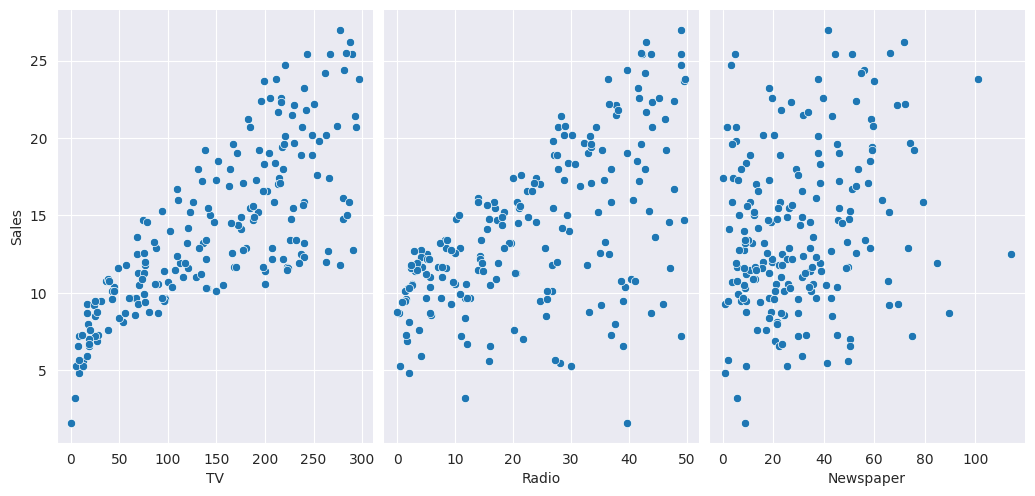

In [ ]:
import seaborn as sns
sns.set_style ("darkgrid")
sns.pairplot(df,x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=5, aspect=0.7)

**1.2.1 Data Preparation**

In [ ]:
#create X and y
#coloumns/ features representing 'X'
feature_cols = ['TV']
X = df[feature_cols]
#what you want to learn predict
y = df.Sales
#lets check the type of the nrw constructs
print (f'The type of X is {type(X)}')
print (f'The type of y is {type(y)}')

The type of X is <class 'pandas.core.frame.DataFrame'>
The type of y is <class 'pandas.core.series.Series'>


# **Build the model (linear Model)**

In [ ]:
#Initiate and fit

simple_lm = LinearRegression()
simple_lm.fit(X,y)

LinearRegression()

In [ ]:
# print the coefficients
print ("iNTERCEPT : ",simple_lm.intercept_)
print ("CO-EFFICIENT : ",simple_lm.coef_)


iNTERCEPT :  7.032593549127695
CO-EFFICIENT :  [0.04753664]


**1.2.3 Interpreting Model Coefficients**

---


#   1.2.4 Make Predictions

In [ ]:
#prediction with sklearn
TV = 230
print(f'Investing{TV} in Tv and Generates {simple_lm.predict ([[TV]])}')

Investing230 in Tv and Generates [17.96602085]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
tv_230s = df.loc[(df['TV'] >= 225) & (df['TV'] <=235)]


In [ ]:
print (f'Mean sales increase {tv_230s.Sales.mean ()}')

Mean sales increase 16.5375


In [ ]:
predictions = simple_lm.predict(X)

In [ ]:
df_eval = pd.DataFrame({'Actual': y, 'Predicted': predictions})
df_eval.head()

,Actual,Predicted
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218


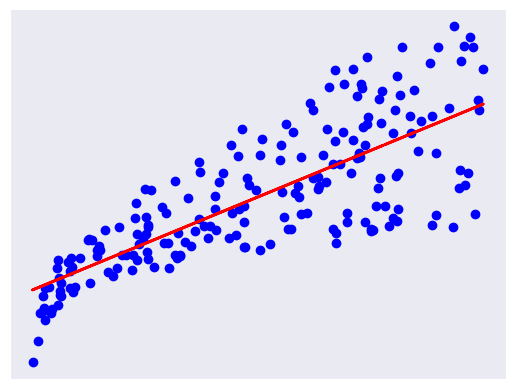

In [ ]:
 import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(X, y, color='blue')# actual values from the dataset
plt.plot(X, predictions, color='red', linewidth=2)# predicted values by the model
plt.xticks(())
plt.yticks(())
plt.show()

# **Evaluation**

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions)))

Mean Absolute Error: 2.549806038927486
Mean Squared Error: 10.512652915656757
Root Mean Squared Error: 3.2423221486546887


**Stats Model**

In [ ]:
import statsmodels.formula.api as sm
# create a fitted model (predict sales given tv investment)
lm1 = sm.ols(formula='Sales ~ TV', data=df).fit()
# check the coefficients
print(lm1.params)

Intercept    7.032594
TV           0.047537
dtype: float64


**Hypothesis Testing and p-values**

In [ ]:
 # print the p-values for the model coefficients
print(f'The p value is {lm1.pvalues}')


The p value is Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64


In [ ]:
a =  1.467390e-42
output = f"{a: .50f}"
print ('The p-value is ', output)

The p-value is   0.00000000000000000000000000000000000000000146739000


**Multiple Linear Regression**

In [ ]:
# prepare the data
X = df[['TV','Radio','Newspaper']]
y = df['Sales']

In [ ]:
model = LinearRegression ()

In [ ]:
model.fit(X, y)
# print the coefficients
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)


Intercept: 
 2.938889369459412
Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]


In [ ]:
 model_coeffs = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
model_coeffs


,Coefficient
TV,0.045765
Radio,0.188530
Newspaper,-0.001037


In [ ]:
#predictions with sklearn
TV = 2.75
Radio = 5.3
Newspaper = 1000
print(f'Investing {TV} in Tv and {Radio} in Radio and {Newspaper} in Newspaper \
\n will generate {model.predict([[TV, Radio, Newspaper]])}')

Investing 2.75 in Tv and 5.3 in Radio and 1000 in Newspaper 
 will generate [3.02645819]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
predictions = model.predict(X)
print('Mean Absolute Error:', metrics.mean_absolute_error(y, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y,predictions)))


Mean Absolute Error: 1.252011229687068
Mean Squared Error: 2.784126314510936
Root Mean Squared Error: 1.6685701407225697


In [108]:
new_sales = 2.938889369459412+ (0.04576465*TV) + (0.18853002*Radio) -(0.00103749*Newspaper)

In [109]:
print (f'The new Sales value is {new_sales}')

The new Sales value is 3.026461262959412


# **page 8 finish**